Using Deep AutoVIML in this notebook to classify chest xrays for COVID 19 postive or not. 

Dataset used here is: https://www.kaggle.com/pranavraikokte/covid19-image-dataset

In [1]:
import numpy as np 
import pandas as pd

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"surabhigovil","key":"a2383170fa9bf2b8de65b2bf4b3f8363"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d pranavraikokte/covid19-image-dataset

 98% 154M/158M [00:01<00:00, 127MB/s]
100% 158M/158M [00:01<00:00, 125MB/s]


In [6]:
! mkdir train

In [7]:
! unzip covid19-image-dataset.zip -d train

Archive:  covid19-image-dataset.zip
  inflating: train/Covid19-dataset/test/Covid/0100.jpeg  
  inflating: train/Covid19-dataset/test/Covid/0102.jpeg  
  inflating: train/Covid19-dataset/test/Covid/0105.png  
  inflating: train/Covid19-dataset/test/Covid/0106.jpeg  
  inflating: train/Covid19-dataset/test/Covid/0108.jpeg  
  inflating: train/Covid19-dataset/test/Covid/0111.jpg  
  inflating: train/Covid19-dataset/test/Covid/0112.jpg  
  inflating: train/Covid19-dataset/test/Covid/0113.jpg  
  inflating: train/Covid19-dataset/test/Covid/0115.jpeg  
  inflating: train/Covid19-dataset/test/Covid/0118.jpeg  
  inflating: train/Covid19-dataset/test/Covid/0119.jpeg  
  inflating: train/Covid19-dataset/test/Covid/0120.jpg  
  inflating: train/Covid19-dataset/test/Covid/094.png  
  inflating: train/Covid19-dataset/test/Covid/096.png  
  inflating: train/Covid19-dataset/test/Covid/098.jpeg  
  inflating: train/Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: train/Covid19-dataset/test

In [8]:
image_dir = '/content/train/Covid19-dataset'
img_height = 224
img_width = 224
img_channels = 3
project_name='covid_19'

In [9]:
keras_model_type =  "image" ## always try "image" when you are dealing with image classification
keras_options = {"early_stopping": True, }  ### always set early_stopping to True first and then change it to False
model_options = {"max_trials":2, 
                 'image_directory': image_dir, 'image_height': img_height, 
                 'image_width':img_width, 'image_channels':img_channels }
## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####

In [10]:
!pip install deep_autoviml

     |████████████████████████████████| 269 kB 8.7 MB/s 
     |████████████████████████████████| 4.4 MB 52.5 MB/s 
     |████████████████████████████████| 170 kB 24.6 MB/s 
     |████████████████████████████████| 14.5 MB 50.6 MB/s 
     |████████████████████████████████| 308 kB 48.7 MB/s 
     |████████████████████████████████| 23.2 MB 1.5 MB/s 
     |████████████████████████████████| 209 kB 68.5 MB/s 
     |████████████████████████████████| 80 kB 9.7 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 144 kB 45.9 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 111 kB 58.9 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=b6d307d846804d3012a5d884086518ef58fc60ff3ca4f6b9754090eb847fecb9
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
  Created wheel for pyperclip: filename=pyperclip-1.8.

In [11]:
from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [12]:
target = 'covid_19'

    Only CPU found on this device
Setting CPU strategy using 1 devices
    Image directory given as /content/train/Covid19-dataset
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory /content/train/Covid19-dataset. Returning...
Found 251 files belonging to 3 classes.

Splitting train into two: train and validation data
Number of image classes = 3 and they are: ['Covid', 'Normal', 'Viral Pneumonia']
Training image model. This will take time...
Epoch 1/20
2/2 [==============================] - 17s 8s/step - loss: 1.2354 - accuracy: 0.4390 - val_loss: 1.1549 - val_accuracy: 0.3750
Epoch 2/20
2/2 [==============================] - 5s 3s/step - loss: 1.0607 - accuracy: 0.4878 - val_loss: 0.9757 - val_accuracy: 0.5469
Epoch 3/20
2/2 [==============================] - 5s 3s/step - loss: 0.9801 - accuracy: 0.5122 - val_loss: 0.8562 - val_accuracy: 0.6406
Epoch 4/20
2/2 [=============

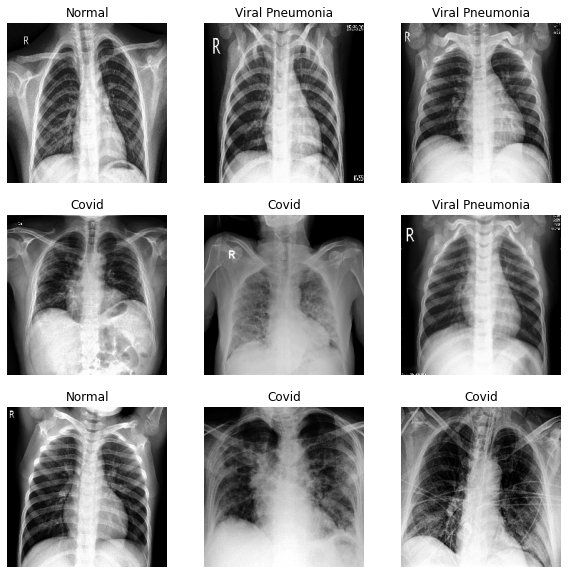

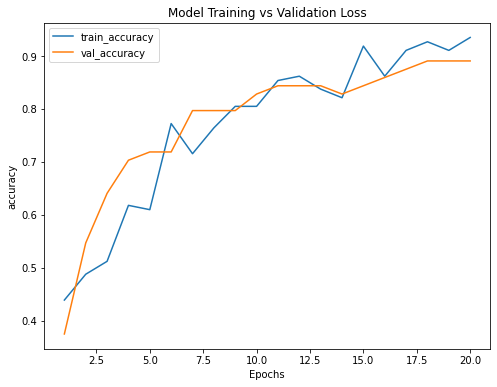

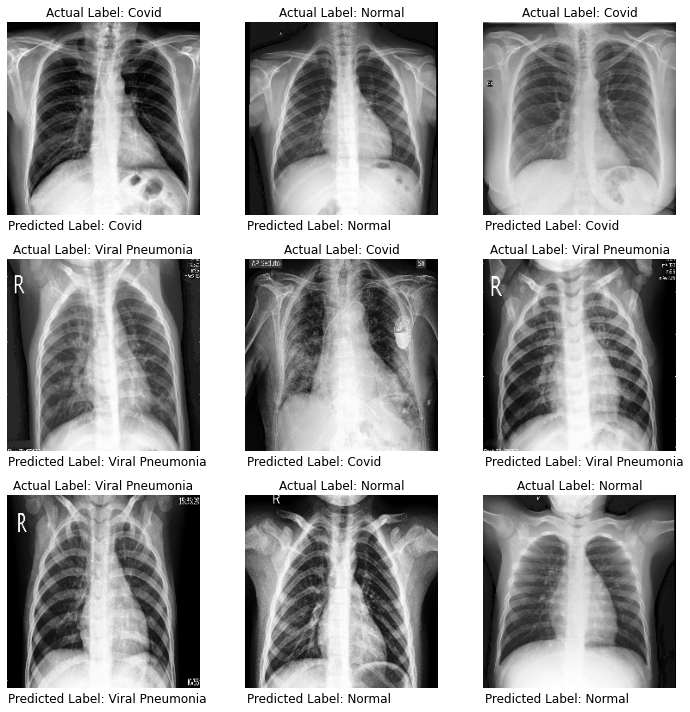

In [13]:
model, dicti = deepauto.fit("", target, keras_model_type=keras_model_type, 
                            project_name=project_name,
                 save_model_flag=False, model_options=model_options,model_use_case='',
                            keras_options=keras_options, use_my_model='', verbose=0)

In [14]:
help(deepauto.predict_images)

Help on function predict_images in module deep_autoviml.modeling.predict_model:

predict_images(test_image_dir, model_or_model_path, cat_vocab_dict, keras_model_type)
    ##############################################################################################



In [15]:
test_image_dir = image_dir + '/test'
predictions = deepauto.predict_images(test_image_dir, model, dicti, keras_model_type)


Loading deep_autoviml model from <keras.engine.sequential.Sequential object at 0x7f78d8c1bb10> folder. This will take time...

Using <keras.engine.sequential.Sequential object at 0x7f78d8c1bb10> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: /content/train/Covid19-dataset/test
Found 66 files belonging to 3 classes.
    Sample predictions before inverse_transform: [2 2 2 2 0]
    Sample predictions after inverse_transform: ['Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Covid']


In [16]:
predictions[-1]

array(['Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Covid', 'Covid', 'Covid', 'Covid', 'Normal',
       'Viral Pneumonia', 'Normal', 'Viral Pneumonia', 'Normal',
       'Viral Pneumonia', 'Covid', 'Covid', 'Normal', 'Viral Pneumonia',
       'Normal', 'Viral Pneumonia', 'Covid', 'Viral Pneumonia', 'Normal',
       'Covid', 'Viral Pneumonia', 'Normal', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Normal', 'Viral Pneumonia',
       'Covid', 'Covid', 'Covid', 'Viral Pneumonia', 'Viral Pneumonia',
       'Covid', 'Viral Pneumonia', 'Covid', 'Covid', 'Covid', 'Normal',
       'Covid', 'Normal', 'Covid', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Normal', 'Covid',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Covid', 'Normal',
       'Viral Pneumonia']